In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
df = pd.read_excel("netflix_titles.xlsx")

In [7]:
#taking a look at the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
1,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
2,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
3,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
4,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies


In [8]:
#getting basic statistics of dataset
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
count,8805,8805,8805,6172,7981,7974,8795,8805.000000,8801,8802,8805
unique,8805,2,8802,4527,7691,748,1766,NaN,17,220,515
top,s3,Movie,2023-07-22 00:00:00,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6130,2,19,19,2817,109,NaN,3206,1793,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.178762,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819796,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


In [9]:
#gettting overview of dataset including column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8805 entries, 0 to 8804
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8805 non-null   object
 1   type          8805 non-null   object
 2   title         8805 non-null   object
 3   director      6172 non-null   object
 4   cast          7981 non-null   object
 5   country       7974 non-null   object
 6   date_added    8795 non-null   object
 7   release_year  8805 non-null   int64 
 8   rating        8801 non-null   object
 9   duration      8802 non-null   object
 10  listed_in     8805 non-null   object
dtypes: int64(1), object(10)
memory usage: 756.8+ KB


In [10]:
#getting row and column numbers(also included in df.info)
df.shape

(8805, 11)

In [11]:
#Finding out spread of null values across all columns
df.isnull().sum()

show_id            0
type               0
title              0
director        2633
cast             824
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [12]:
#finding out if there are duplicate date. Zero(0) feedback indivates none
df.duplicated().sum()

0

### Data Cleaning Steps



In [13]:
#checking to see if the singular null value row in show_id can be dropped. It cam because other records from type, title and director are empty as well
df[df.show_id.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in


In [14]:
#checking to see current data state
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
1,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
2,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
3,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
4,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies


In [15]:
#checking to see other null values. Since these values are non numerical and unlikely to affect my analysis, they will not be dropped or filled in
df.isnull().sum()

show_id            0
type               0
title              0
director        2633
cast             824
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [16]:
#splitting column entry strings with several records to make analysis clearer
df['cast'] = df.cast.str.split(pat = ',', expand = True)[0]
df['country'] = df.country.str.split(pat = ',', expand = True)[0]
df['genre'] = df.listed_in.str.split(pat = ',', expand = True)[0]

In [17]:
#checking to see the new columns
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,genre
0,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
1,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",Docuseries
2,s5,TV Show,Kota Factory,NaN,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows
3,s6,TV Show,Midnight Mass,Mike Flanagan,Kate Siegel,NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas
4,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha",Vanessa Hudgens,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Children & Family Movies


In [18]:
#droppimg row one which has an inconsistent show_id of a name kirsten johnson
df.drop([1], axis = 0, inplace = True)

In [19]:
df.drop([0], axis = 0, inplace = True)

In [20]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,genre
2,s5,TV Show,Kota Factory,NaN,Mayur More,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows
3,s6,TV Show,Midnight Mass,Mike Flanagan,Kate Siegel,NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",TV Dramas
4,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha",Vanessa Hudgens,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Children & Family Movies
5,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Dramas
6,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",British TV Shows


In [21]:
#splitting director name strings
df['director'] = df.director.str.split(pat = ',', expand = True)[0]

In [22]:
#dropping columns not needed for analysis
df.drop(['description', 'date_added', 'listed_in'], axis = 1, inplace = True)

KeyError: "['description'] not found in axis"

In [23]:
#renaming type to more suitable column name 'category'
df.rename(columns ={'type' :'category'}, inplace = True)

In [24]:
#final dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8803 entries, 2 to 8804
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8803 non-null   object
 1   category      8803 non-null   object
 2   title         8803 non-null   object
 3   director      6171 non-null   object
 4   cast          7980 non-null   object
 5   country       7974 non-null   object
 6   date_added    8793 non-null   object
 7   release_year  8803 non-null   int64 
 8   rating        8799 non-null   object
 9   duration      8800 non-null   object
 10  listed_in     8803 non-null   object
 11  genre         8803 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.1+ KB


### Exploratory Data Analysis
Question 1

How many Movies versus Tv Shows are on Netflix?

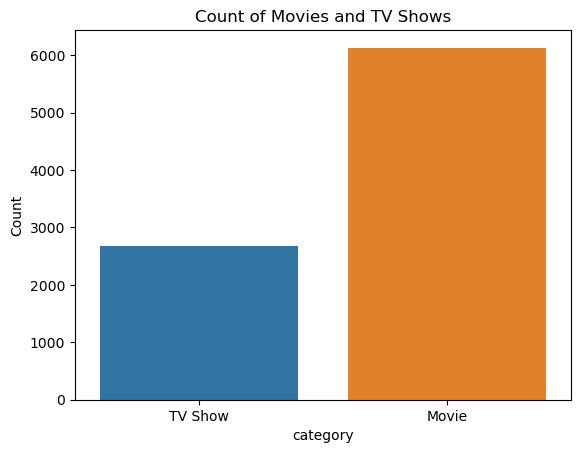

In [25]:
sns.countplot(x='category', data=df)
plt.xlabel('category')
plt.ylabel('Count')
plt.title('Count of Movies and TV Shows')
plt.show()

This shows that there are more movies listed (about 6000) on Netflix compared to 2000+ Tv shows


#### Question 2


Which genre is the most popular in Netflix?

In [26]:
def plot_cat(var, l=12, b=5):
    plt.figure(figsize = (l, b))
    sns.countplot(df[var], order = df[var].value_counts().index)
    plt.xticks(rotation = 90)

C:\Users\akinj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


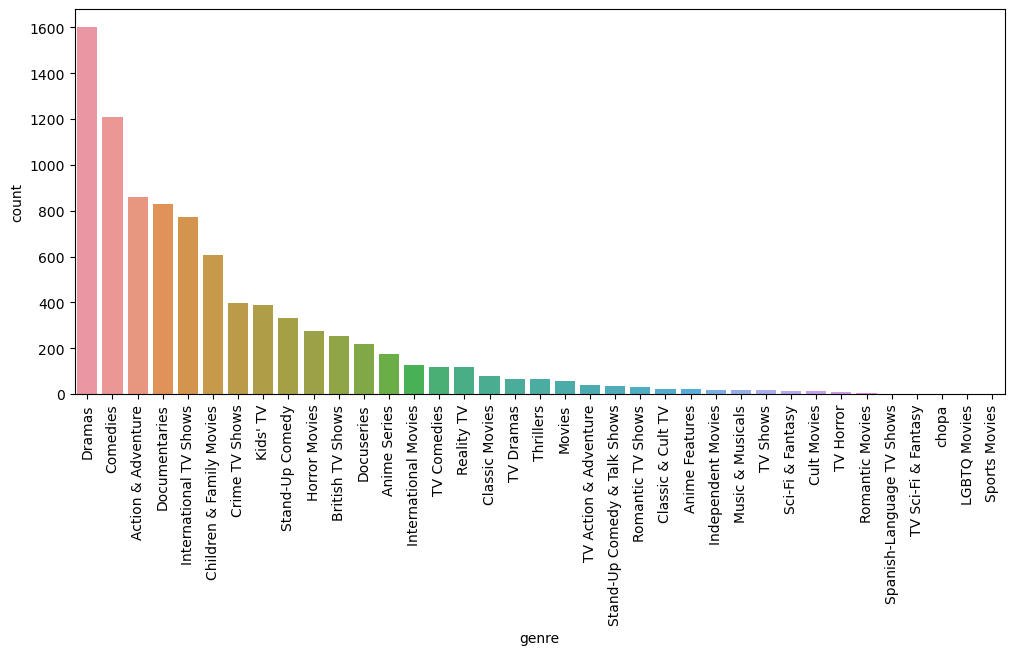

In [27]:
plot_cat('genre')

This shows that the most popular genre is Drama followed by Comedies and Action while the least popular genre is sports movies

### Question 3

How many movies/Tv shows are available in each release year?

C:\Users\akinj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


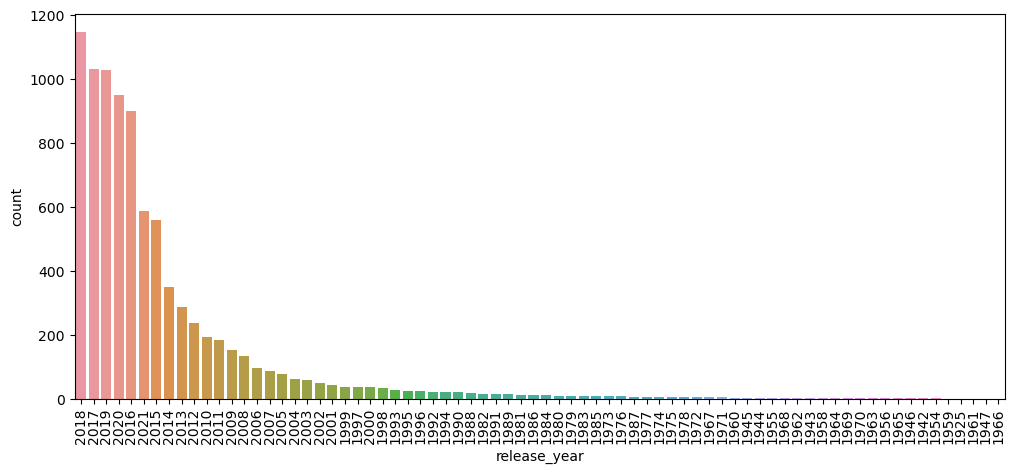

In [28]:
plot_cat('release_year')

### Question 4

Which countries had the highest number of titles?

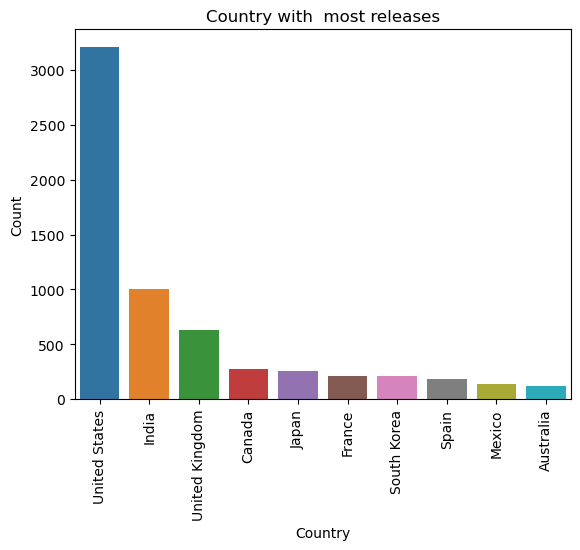

In [29]:
genre_counts = df['country'].value_counts().head(10)

sns.countplot(x='country', data=df, order=genre_counts.index)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country with  most releases')
plt.show()

This shows that United States has the most releases with over 3000 titles, followed by India and the United Kingdom

### Question 5 

Which movie or show rating had the highest releases?

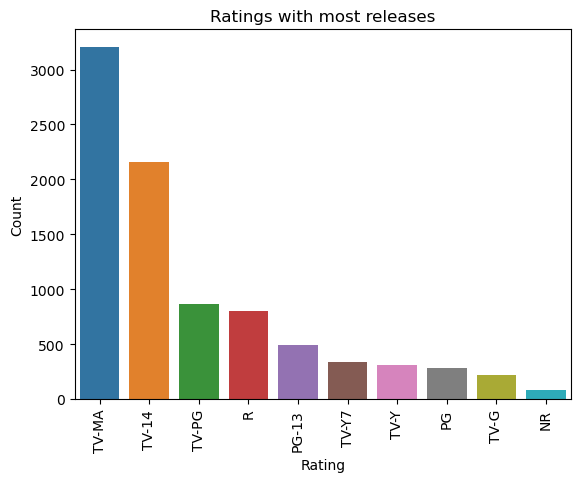

In [30]:
genre_counts = df['rating'].value_counts().head(10)

sns.countplot(x='rating', data=df, order=genre_counts.index)
plt.xticks(rotation=90)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Ratings with most releases')
plt.show()

The TV-MA rating had the most releases followed by the TV-14 and TV-PG rating

### Question 6

Which directors had the most releases?

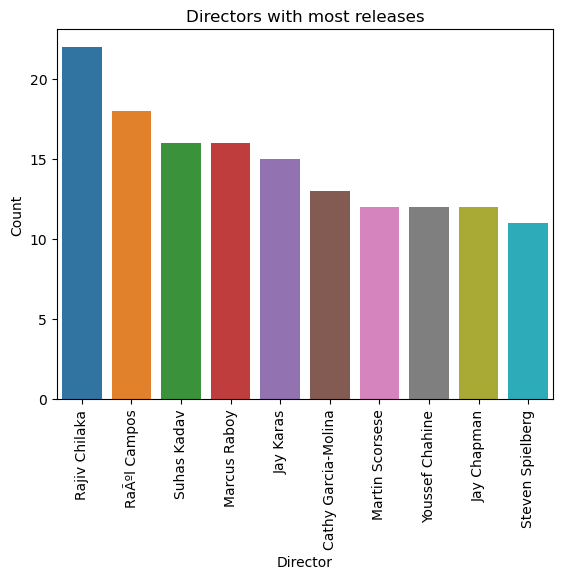

In [31]:
genre_counts = df['director'].value_counts().head(10)

sns.countplot(x='director', data=df, order=genre_counts.index)
plt.xticks(rotation=90)
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Directors with most releases')
plt.show()

The director with the highest release is Rajiv Chilaka with about 23 releases followed by Ra Campos and Suhas Kadav

### Question 7

What is the genre spread for top director Rajiv Chilaka?

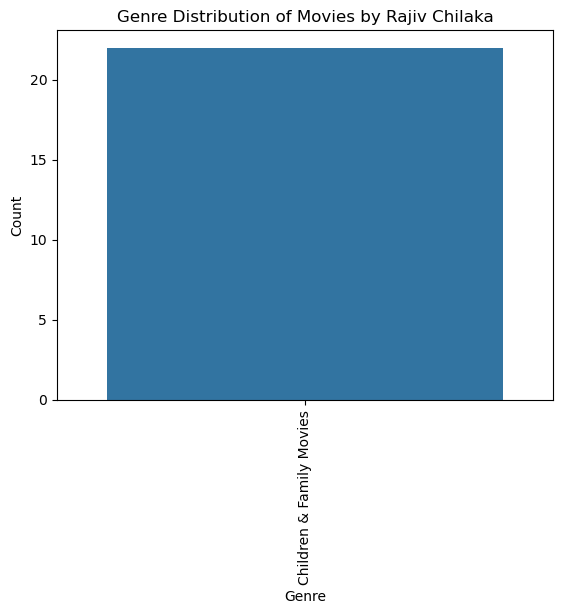

In [32]:
top_director = df['director'].value_counts().index[0]

# Filtering the DataFrame for the movies directed by RC
movies_by_RC = df[df['director'] == top_director]

# Creating a count plot of genres for the movies by RC
sns.countplot(x='genre', data=movies_by_RC)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title(f'Genre Distribution of Movies by {top_director}')
plt.show()


From the above, his movies are all in the Children and Family movies genre.

### Question 8

Which actor appeared in the most Tv shows or series?

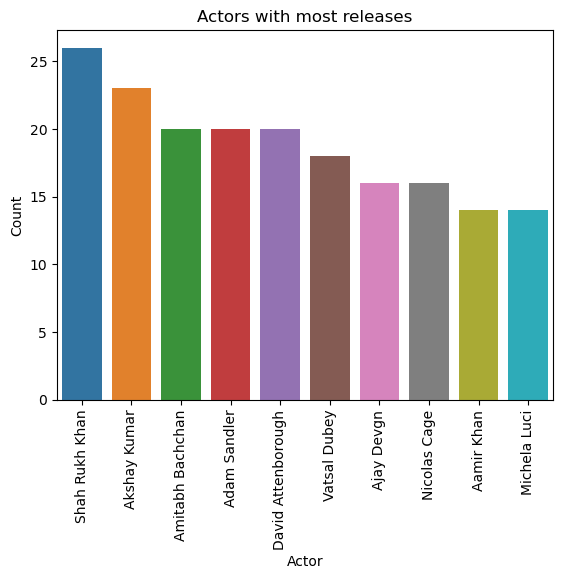

In [33]:
#finding the actor(also stands for actress) with most releases
genre_counts = df['cast'].value_counts().head(10)

sns.countplot(x='cast', data=df, order=genre_counts.index)
plt.xticks(rotation=90)
plt.xlabel('Actor')
plt.ylabel('Count')
plt.title('Actors with most releases')
plt.show()

Shah Rukh Khan who is incidentally my favourite bollywood actor was the actor with the most releases with over 25 movies

### Question 9

How many Nigerian titles are on Netflix?

In [34]:
# getting the number of Nigerian titles

nigerian_titles = df[df['country'] == 'Nigeria']

num_nigerian_titles = len(nigerian_titles) # getting the count of Nigerian titles

print('The number of titles from Nigeria is:', num_nigerian_titles)

The number of titles from Nigeria is: 96


The number of Nigerian titles are 96. It would be interesting to see how many are movies and how many are tv shows

### Question 10

How many Nigerian movies versus series are on Netflix?

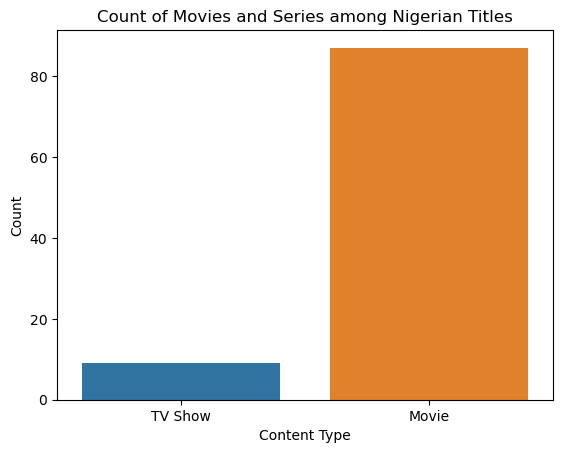

In [35]:
# Filter Nigerian titles
nigerian_titles = df[df['country'] == 'Nigeria']

# Create countplot
sns.countplot(x='category', data=nigerian_titles)
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.title('Count of Movies and Series among Nigerian Titles')
plt.show()

This shows that there are over 80 Nigerian movies compared to Tv shows on Netflix. I am curious to see what Nigerian TV shows are on Netflix since they are less than 10 in total

### Question 11

What titles comprise the Nigerian TV shows on Netflix?

In [36]:
# Filter Nigerian TV show titles
nigerian_tv_shows = nigerian_titles[nigerian_titles['category'] == 'TV Show']

# Print the TV show titles
tv_show_titles = nigerian_tv_shows['title'].tolist()
print("Nigerian TV Show Titles:")
for title in tv_show_titles:
    print(title)


Nigerian TV Show Titles:
Castle and Castle
King of Boys: The Return of the King
Before 30
Ojos in d' House
The Governor
On the Real
Fifty: The Series
Sons of the Caliphate
Crazy, Lovely, Cool


This is interesting to note especially as I can see some blockbuster series such as King of boys, The Governor and castle and castle. Next I'd like to know the most popular Nigerian actor and most popular director.

### Question 12

Which Nigerian actor has the most releases on Netflix?

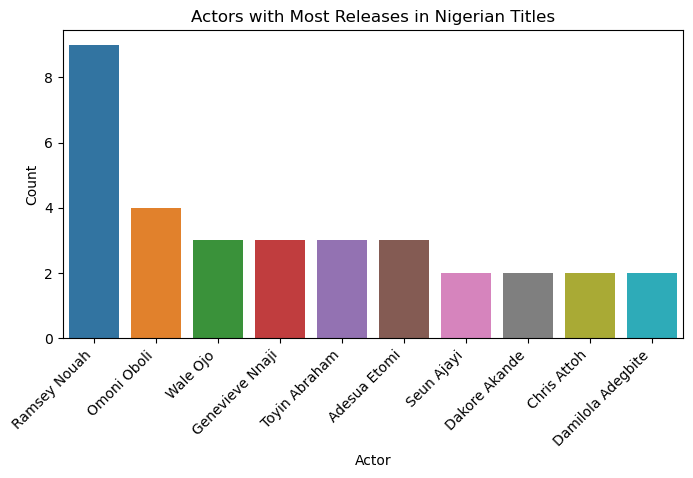

In [38]:
# Filter Nigerian titles
nigerian_titles = df[df['country'] == 'Nigeria']

#Count the occurrences of each actor
actor_counts = nigerian_titles['cast'].value_counts()

# Plot the actors with most releases
plt.figure(figsize=(8, 4))
sns.barplot(x=actor_counts.index[:10], y=actor_counts.values[:10])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Actor')
plt.ylabel('Count')
plt.title('Actors with Most Releases in Nigerian Titles')
plt.show()


This shows that the top actor, appearing in 9 shows is Ramsey Nouah, followed by Omoni Oboli and wale Ojo

### Question 13

Who is the top Nigerian director?


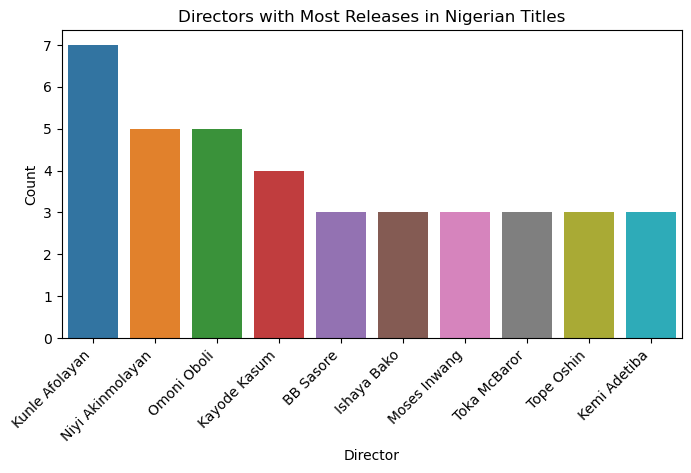

In [39]:
#finding the top director
nigerian_titles = df[df['country'] == 'Nigeria']

#Count the occurrences of each actor
director_counts = nigerian_titles['director'].value_counts()

# Plot the actors with most releases
plt.figure(figsize=(8, 4))
sns.barplot(x=director_counts.index[:10], y=director_counts.values[:10])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Directors with Most Releases in Nigerian Titles')
plt.show()


The top Nigerian director on Netflix is Kunle Afoloyan with 7 shows/movies to his credit followed by Niyi Akinmolayan and Omoni Oboli.